<a href="https://colab.research.google.com/github/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


Millen Tavares Rodrigues

Tia: 92300073

Disponível em [github](https://github.com/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha6.ipynb)

Utilizando dados de https://www.kaggle.com/datasets/willianoliveiragibin/covid-19-daily-updates/data

In [6]:
# libs
import pandas as pd
import matplotlib.pyplot as plt

# carrega dados
df = pd.read_csv('Coronavirus_cases_daily_update.csv')
df.head()

<ipython-input-6-7f57222ec164>:6: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Coronavirus_cases_daily_update.csv')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
#numero de linhas e colunas
df.shape

(101135, 67)

In [10]:
# numero de localidades monitoradas
df.location.unique().size

72

In [11]:
# numero de dias presentes no dataset
df.date.unique().size

1417

In [16]:
df[df['location']=='Asia'].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
16901,OWID_ASI,NaN,Asia,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
16902,OWID_ASI,NaN,Asia,2020-01-04,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
16903,OWID_ASI,NaN,Asia,2020-01-05,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
16904,OWID_ASI,NaN,Asia,2020-01-06,4.0,3.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
16905,OWID_ASI,NaN,Asia,2020-01-07,4.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN


In [29]:
grouped_df = df[df['continent'].str.len() > 0].groupby('location')['new_cases'].sum().reset_index().sort_values('new_cases', ascending = False)
top5 = grouped_df[:15].copy()

outros = pd.DataFrame(data = {
    'location' : ['Outros'],
    'new_cases' : [df['new_cases'][15:].sum()]
})
plot_df = pd.concat([top5, outros])
plot_df

,location,new_cases
42,China,99318742.0
28,Brazil,37722322.0
11,Australia,11629977.0
8,Argentina,10054576.0
43,Colombia,6383530.0
12,Austria,6081287.0
41,Chile,5288930.0
19,Belgium,4827188.0
36,Canada,4716209.0
53,Czechia,4670697.0


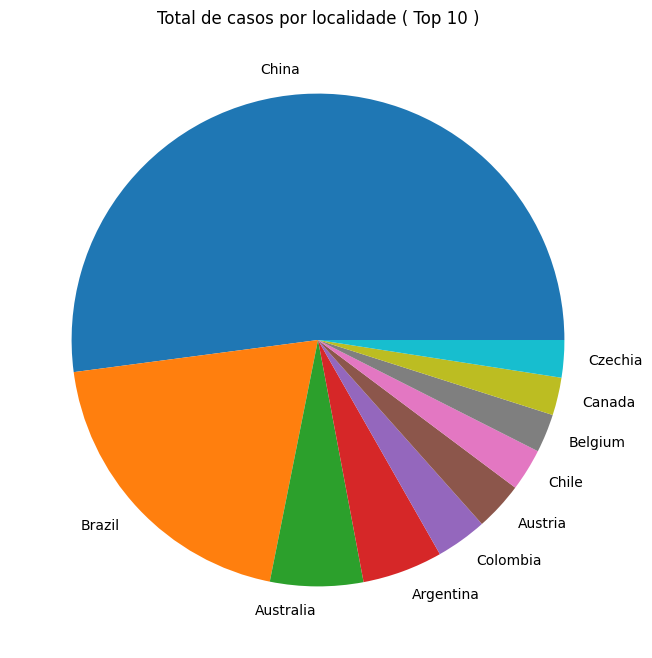

In [54]:
grouped_df = df[df['continent'].str.len() > 0].groupby('location')['total_cases'].max().reset_index().sort_values('total_cases', ascending = False)
top10 = grouped_df[:10].copy()
top_locations = top10['location']

plt.figure(figsize=(8, 8))
plt.pie(top10['total_cases'], labels=top10['location'])
plt.title('Total de casos por localidade ( Top 10 )')
plt.show()


In [57]:
for a in grouped_df.location:
  print(a)

China
Brazil
Australia
Argentina
Colombia
Austria
Chile
Belgium
Canada
Czechia
Denmark
Bangladesh
Bulgaria
Croatia
Costa Rica
Bolivia
Cuba
Ecuador
Belarus
Azerbaijan
Bahrain
Dominican Republic
Cyprus
Estonia
Egypt
Ethiopia
Armenia
Bosnia and Herzegovina
Albania
Botswana
Brunei
Algeria
Afghanistan
El Salvador
Cambodia
Cameroon
Barbados
Angola
Democratic Republic of Congo
Cote d'Ivoire
Eswatini
Belize
Cape Verde
Bhutan
Burundi
Andorra
Curacao
Aruba
Bahamas
Cayman Islands
Benin
Congo
Burkina Faso
Bermuda
Equatorial Guinea
Dominica
Djibouti
Central African Republic
Bonaire Sint Eustatius and Saba
Eritrea
Comoros
Antigua and Barbuda
American Samoa
Chad
British Virgin Islands
Cook Islands
Anguilla
England


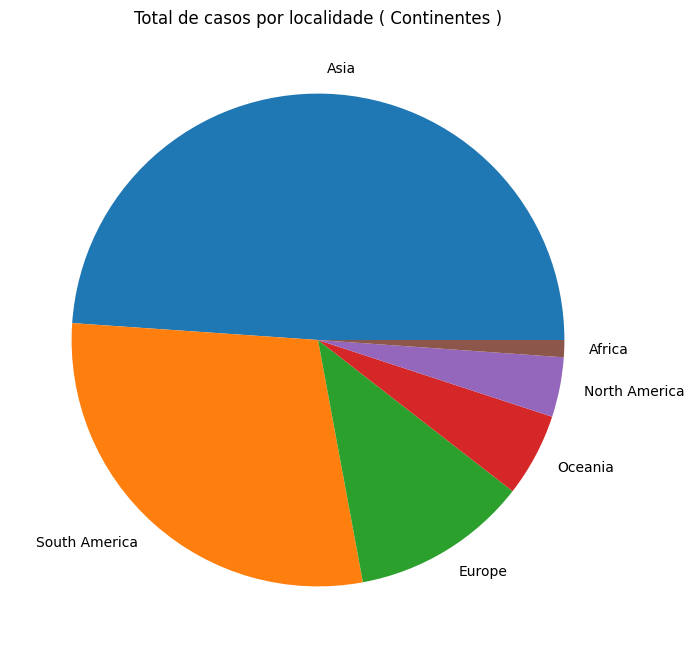

In [39]:
df_continents = df[df['continent'].str.len() > 0].groupby('continent')['new_cases'].sum().reset_index().sort_values('new_cases', ascending = False)
plt.figure(figsize=(8, 8))
plt.pie(df_continents['new_cases'], labels=df_continents['continent'])
plt.title('Total de casos por localidade ( Continentes )')
plt.show()


In [48]:
df_filtrado

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
12663,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
12664,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
19723,AUT,Europe,Austria,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,30.9,NaN,7.37,81.54,0.922,8939617.0,NaN,NaN,NaN,NaN
29572,BEL,Europe,Belgium,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
42235,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.20,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78838,CZE,Europe,Czechia,2023-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,38.3,NaN,6.63,79.38,0.900,10493990.0,NaN,NaN,NaN,NaN
14077,ARG,South America,Argentina,2023-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
14078,ARG,South America,Argentina,2023-11-16,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.00,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN
78839,CZE,Europe,Czechia,2023-11-16,NaN,NaN,NaN,NaN,NaN,NaN,...,38.3,NaN,6.63,79.38,0.900,10493990.0,NaN,NaN,NaN,NaN


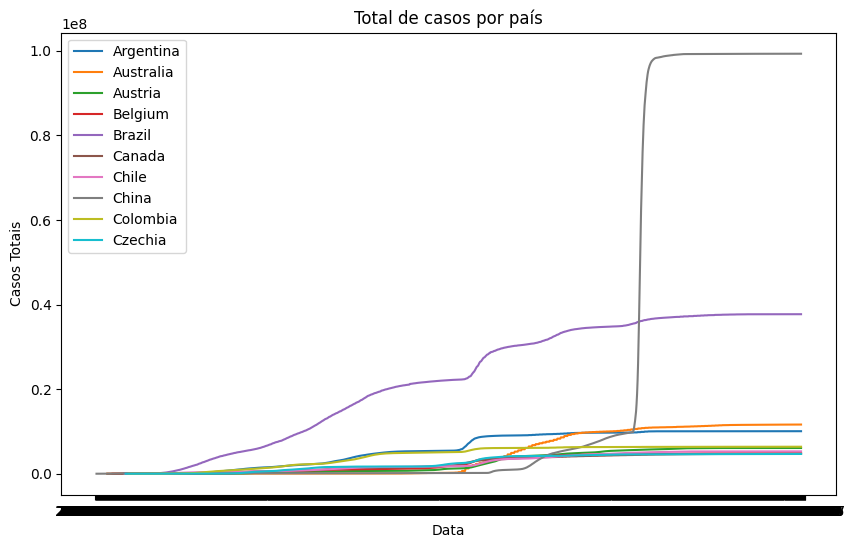

In [50]:
plt.figure(figsize=(10, 6))
df_filtrado = df[df['location'].isin(top_locations)].sort_values('date')
for location, group in df_filtrado.groupby('location'):
    plt.plot(group['date'], group['total_cases'], label=location)

plt.title('Total de casos por país')
plt.xlabel('Data')
plt.ylabel('Casos Totais')
plt.legend()
plt.show()


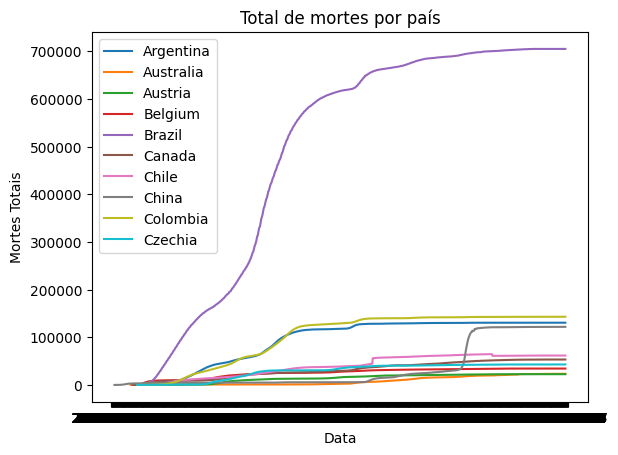

In [51]:
for location, group in df_filtrado.groupby('location'):
    plt.plot(group['date'], group['total_deaths'], label=location)

plt.title('Total de mortes por país')
plt.xlabel('Data')
plt.ylabel('Mortes Totais')
plt.legend()
plt.show()


# Sobre o conjunto de dados

No final de dezembro de 2019, as pessoas em Wuhan, na China, começaram a adoecer com uma pneumonia até então desconhecida, marcando o início de uma nova doença infecciosa, mais tarde identificada como um novo tipo de coronavírus e denominada SARS-CoV-2. A doença causada pelo vírus foi denominada doença coronavírus 2019 (COVID-19) pela Organização Mundial da Saúde (OMS).

A OMS declarou o surto de COVID-19 uma Emergência de Saúde Pública de Importância Internacional em 30 de janeiro de 2020, e uma pandemia em 11 de março de 2020.

De dezembro de 2019 a 25 de maio de 2023, ocorreram quase 700 milhões de casos de COVID-19 e quase 7 milhões de mortes em todo o mundo.
Os casos foram relatados em 229 países e territórios. Apenas o Turquemenistão nunca notificou um único caso.
Quase desde o início da pandemia (primavera de 2020), os Estados Unidos lideraram o mundo em número de casos e mortes. Tem cerca de 62 milhões de casos a mais do que o próximo país mais próximo (Índia).
A criação e popularização de kits de testes domésticos anularam a maioria dos sistemas de rastreamento. O meio mais eficaz de rastrear a presença da COVID-19 é testar a quantidade do vírus nas águas residuais, uma vez que a maioria dos testes domésticos não são comunicados.
A OMS suspendeu a Emergência de Saúde Pública de Importância Internacional (PHEIC) para a COVID-19 em 5 de maio de 2023. Os EUA encerraram a Emergência de Saúde Pública federal da COVID-19 em 11 de maio de 2023.

A criação de vacinas para combater o vírus marcou uma viragem significativa na taxa de mortes e infecções.
A primeira vacina foi administrada em 8 de dezembro de 2020.
Em 25 de maio de 2023, 70% da população mundial recebeu pelo menos uma dose da vacina COVID-19. Isto cai significativamente para pessoas em países de baixa renda, onde apenas 30% das pessoas receberam a primeira dose.
Mais de 13,39 mil milhões de doses de vacinas foram administradas para combater a pandemia.

# Observações

É notável a ausência de paises muito impactados por COVID nesse dataset como EUA, India, Alemanha, França entre outros.